In [1]:
%pylab inline

# JSAnimation import available at https://github.com/jakevdp/JSAnimation
from JSAnimation import IPython_display
from matplotlib import animation

Populating the interactive namespace from numpy and matplotlib


In [2]:
def wave(x,t,k0,c,sigmak,pkmax,nstep):
    total=0
    dk=2*pkmax*sigmak/nstep
    for i in range(nstep):
        k=k0 - pkmax *sigmak+i*dk
        omega=c*k
        total += exp(-(k-k0)**2/sigmak)*exp(1j*(k*x-omega*t))*dk
        # print (i,'k=',k)
    return (total.real)

In [3]:
#     k0,c,sigmak,pkmax,nstep
params=[1, .2, 0.1, 5, 20] 

In [4]:
wave(2.7, 10, *params)

0.41415166898140243

In [13]:
k0=1
sigmak=0.02*k0
c=0.1
pkmax=5
kstep=10

xx=10
xmin=-xx*2*pi/k0
xmax=xx*2*pi/k0
xstep=300

nstep=20

params=[k0,c,sigmak,pkmax,nstep]
ymax=wave(0, 0, k0, c,sigmak, pkmax, kstep)

ymax = 0.170719983921


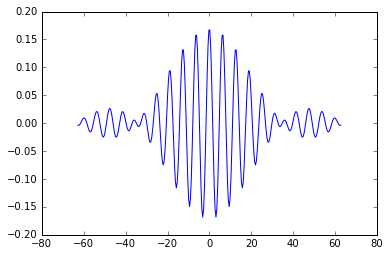

In [14]:
x = np.linspace(xmin, xmax, xstep)
y=wave(x, 0, k0, c,sigmak, pkmax, kstep)

print('ymax =',ymax)
plot(x,y)

In [12]:
%%capture
# create a simple animation
fig = plt.figure()

ax = plt.axes(xlim=(xmin,xmax), ylim=(-ymax, ymax))
line, = ax.plot([], [], lw=2)

def init():
    line.set_data([], [])
    return line,

def animate(i):
    line.set_data(x, wave(x, i,*params))
    return line,




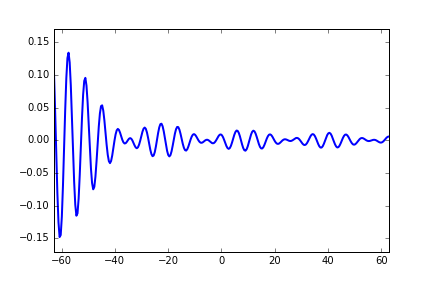
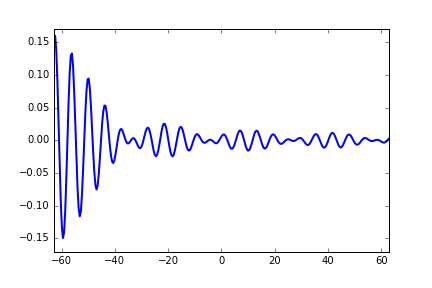
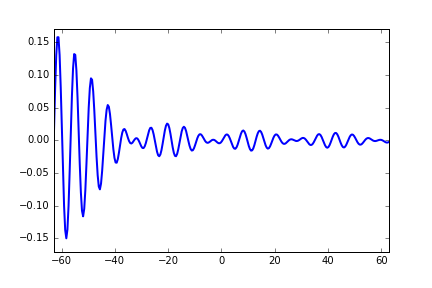
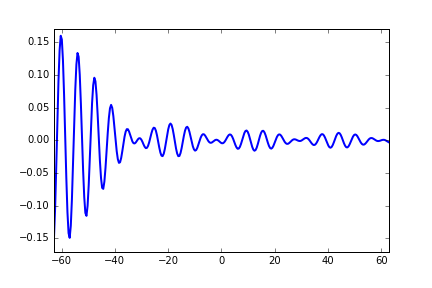
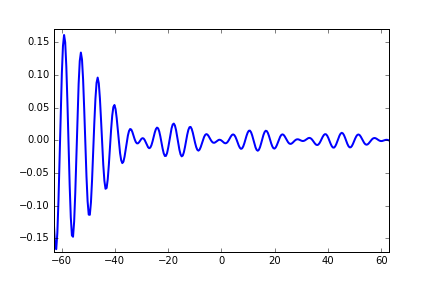
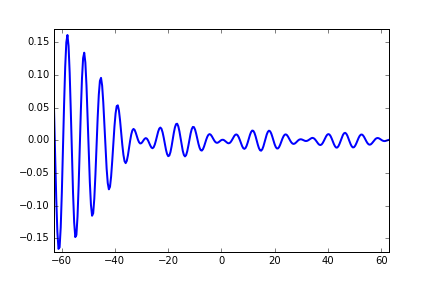
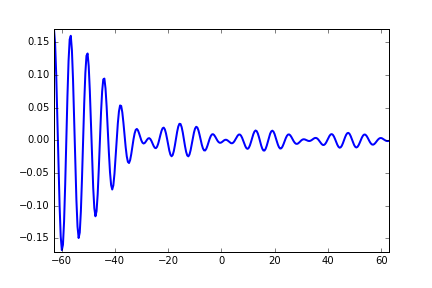
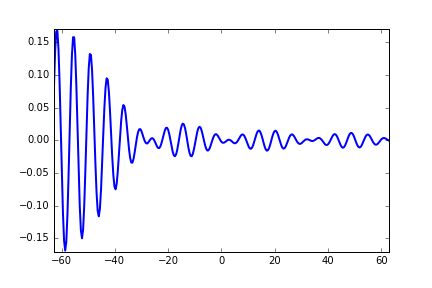
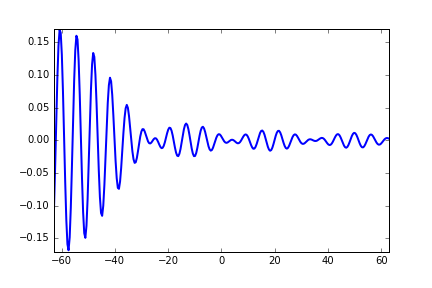
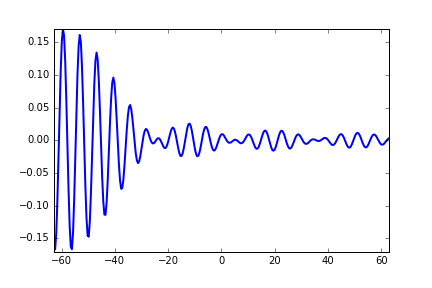
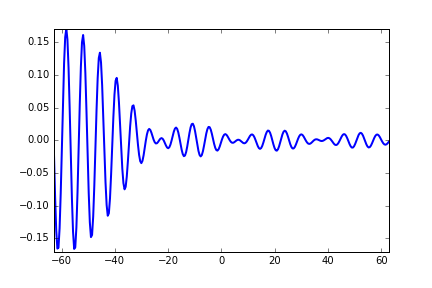
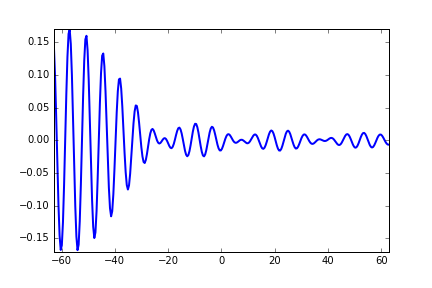
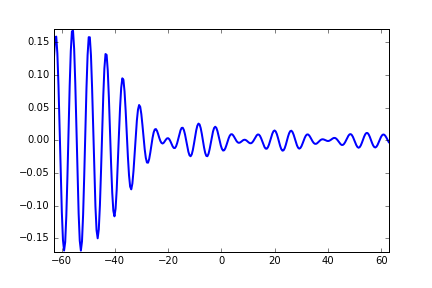
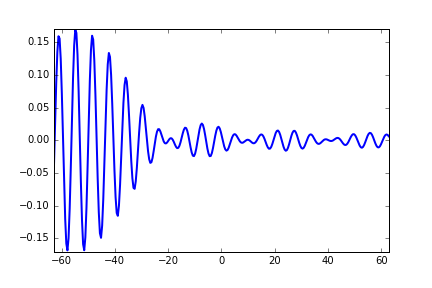
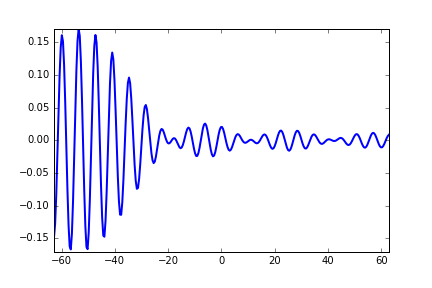
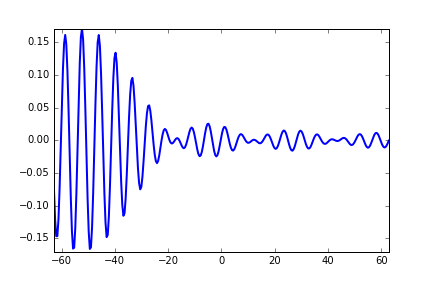
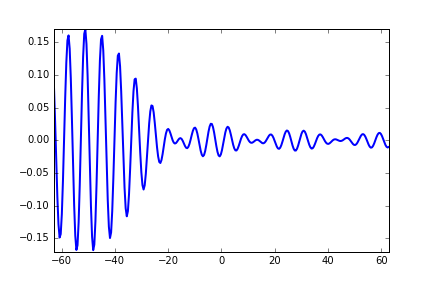
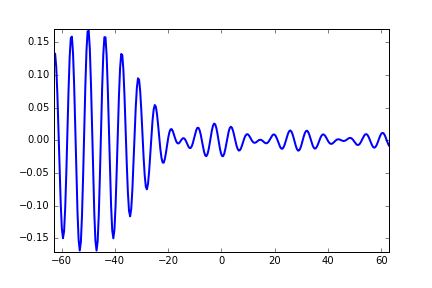
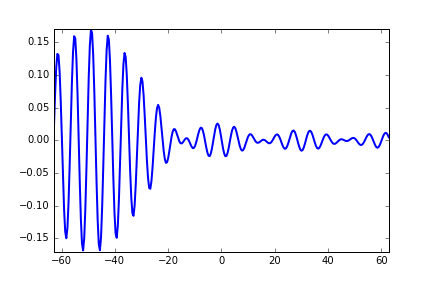
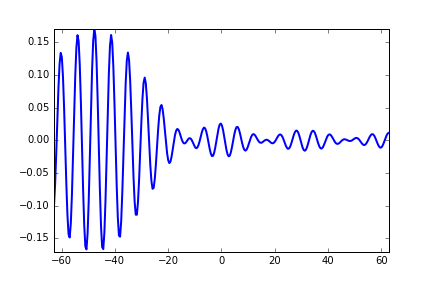
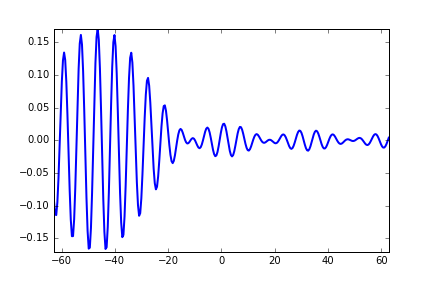
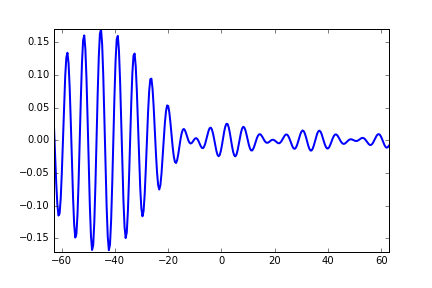
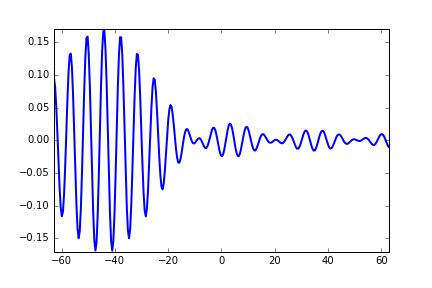
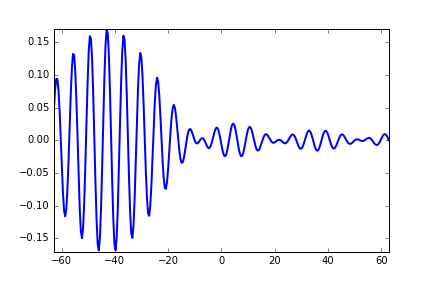
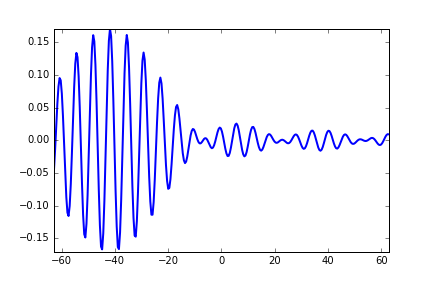
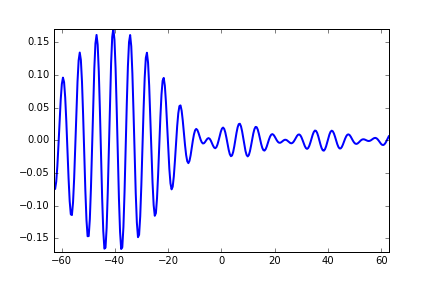
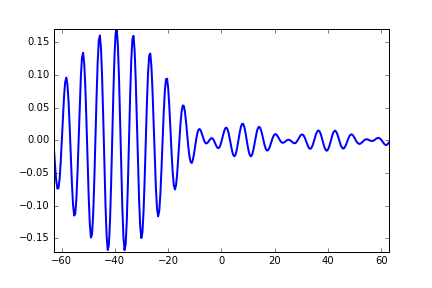
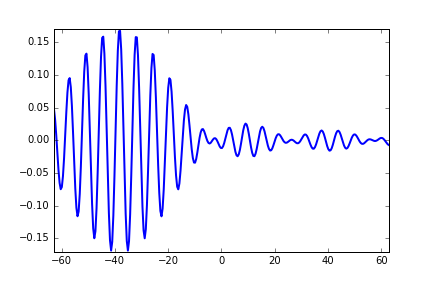
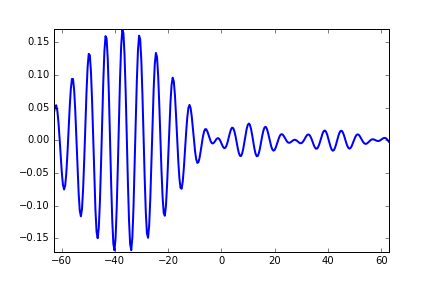
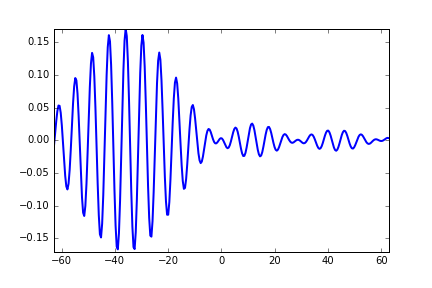
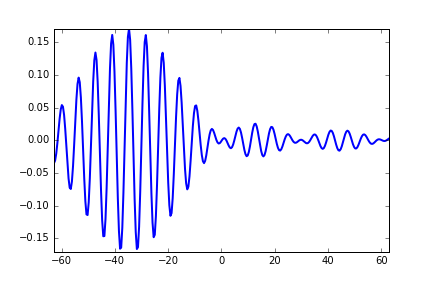
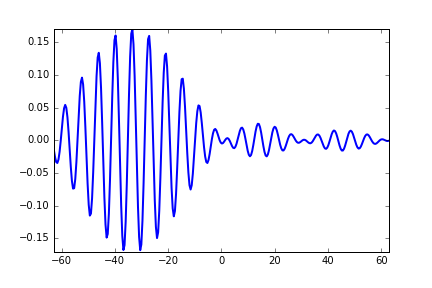
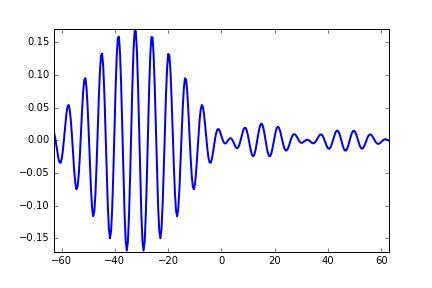
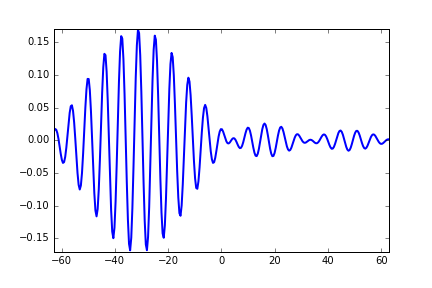
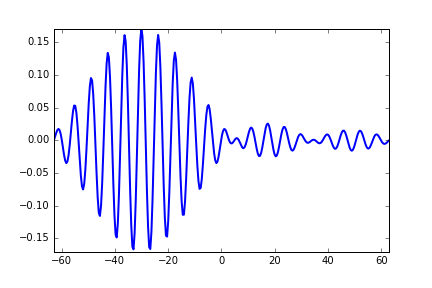
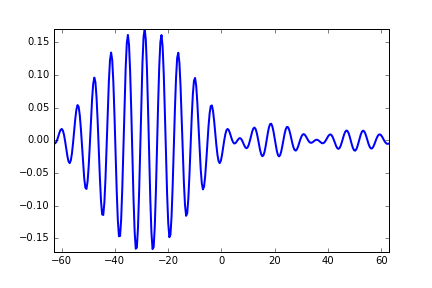
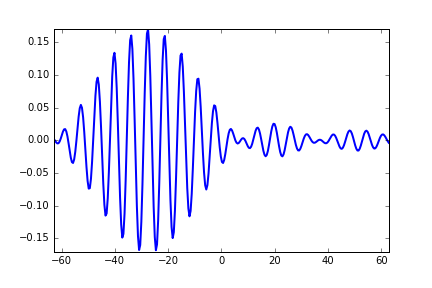
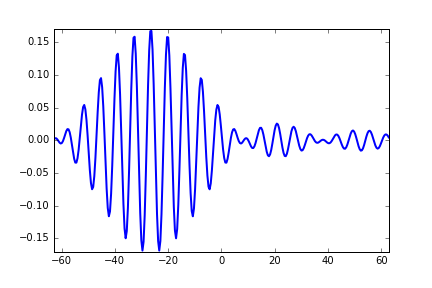
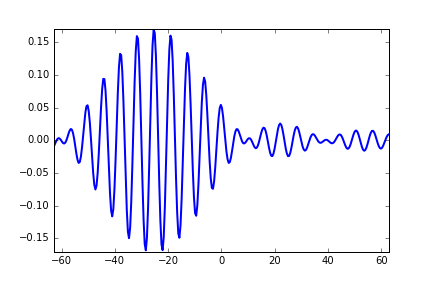
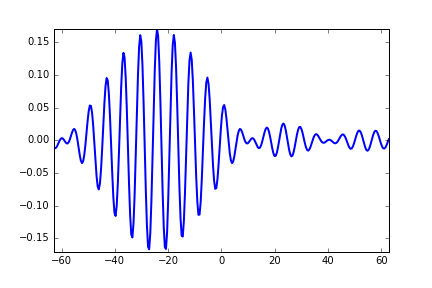
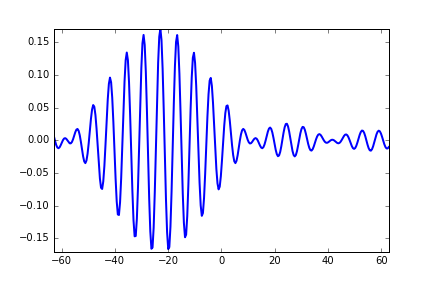
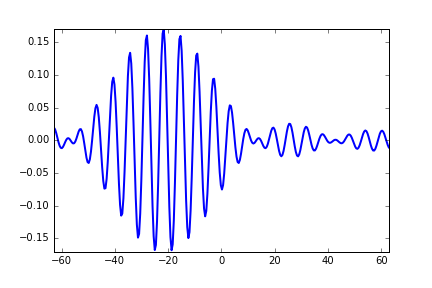
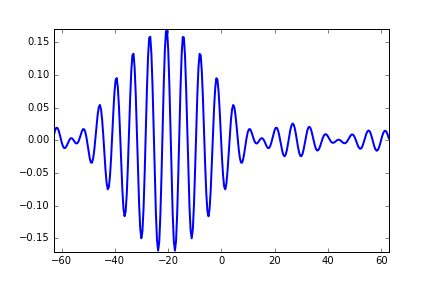
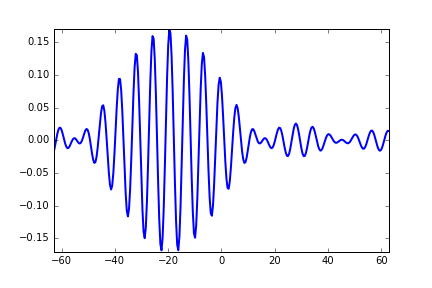
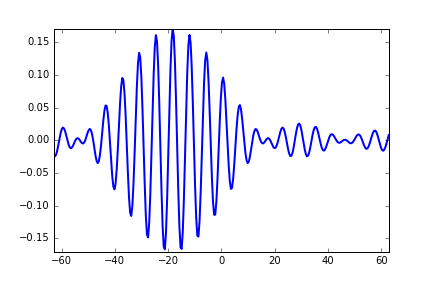
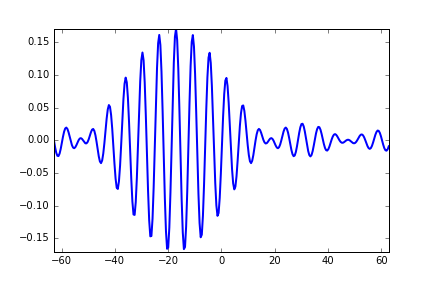
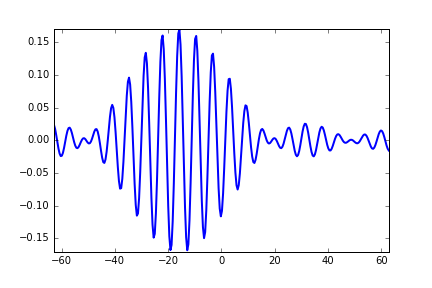
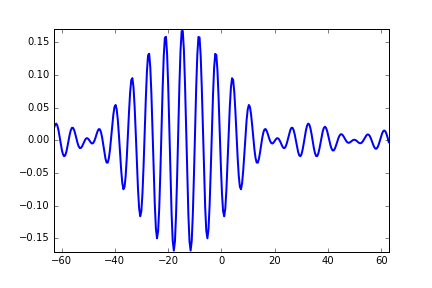
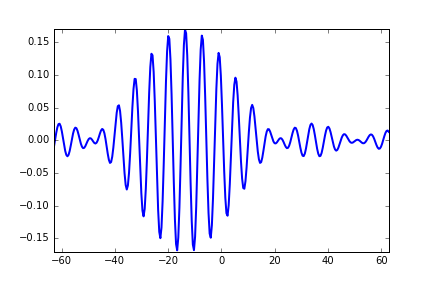
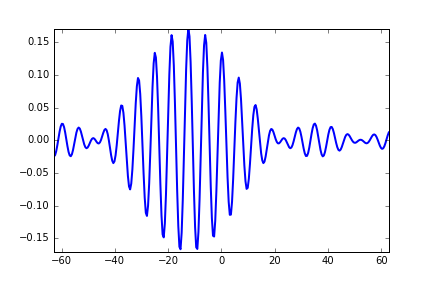
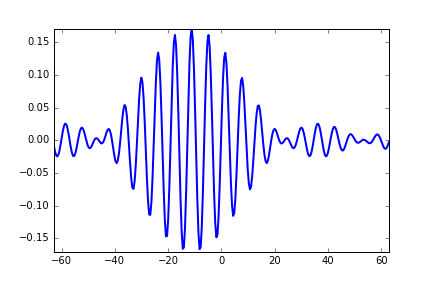
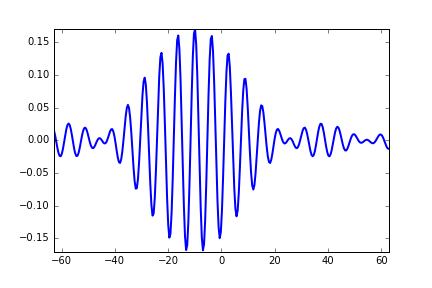
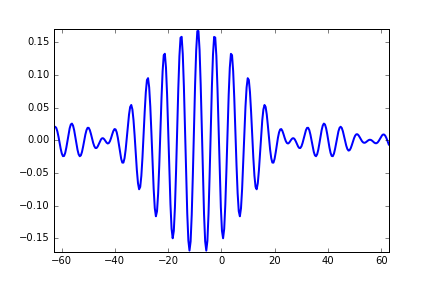
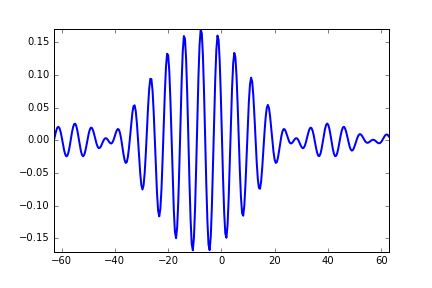
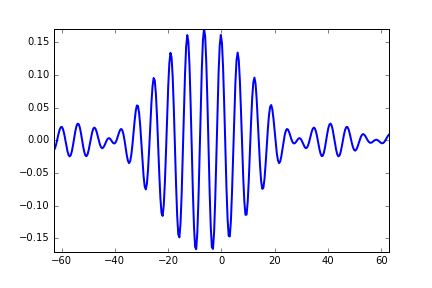
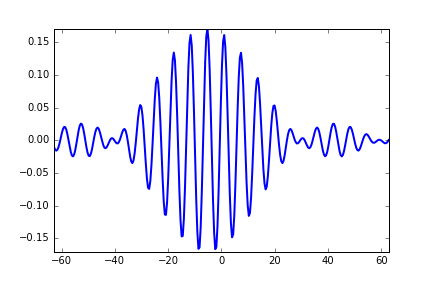
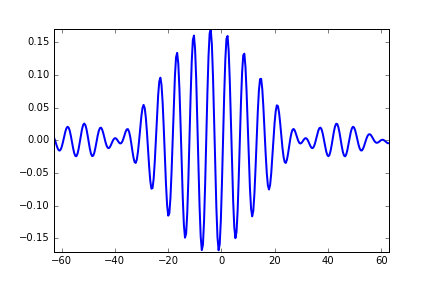
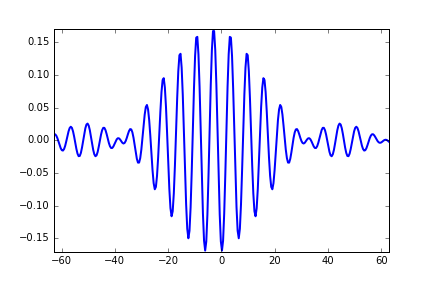
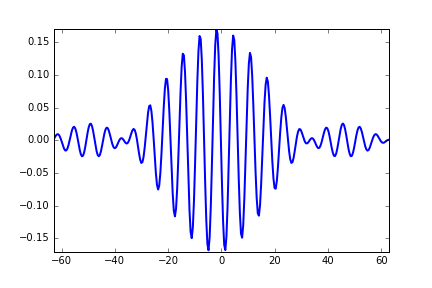
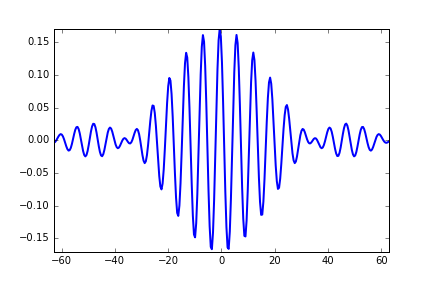
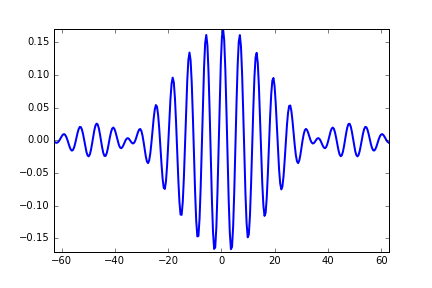
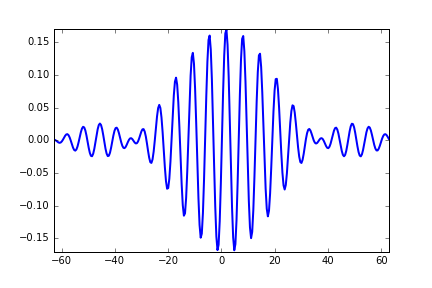
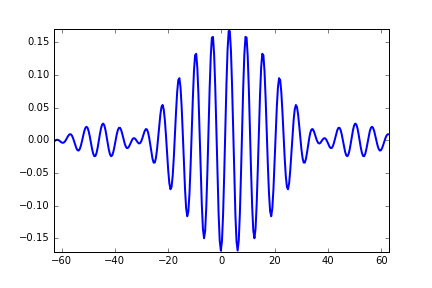
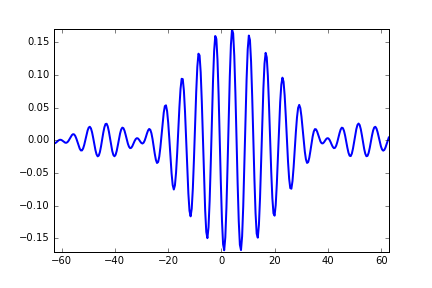
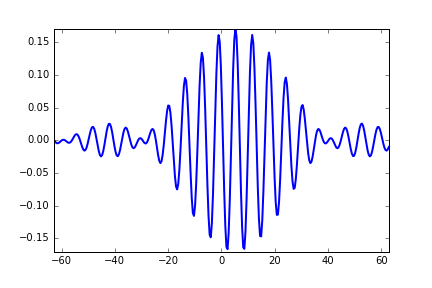
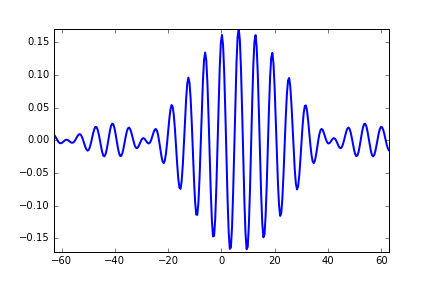
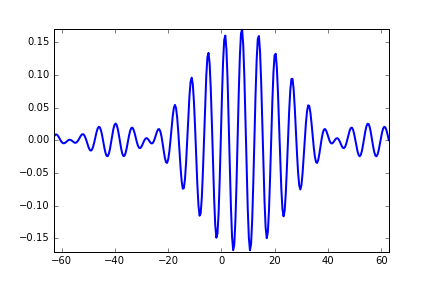
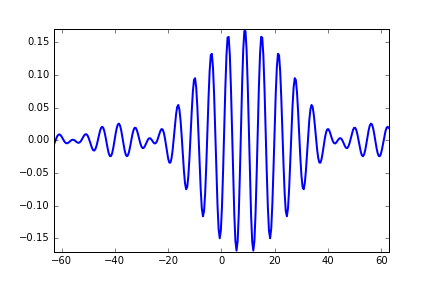
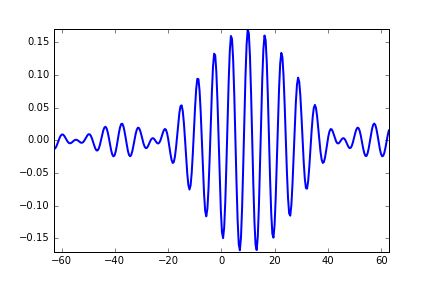
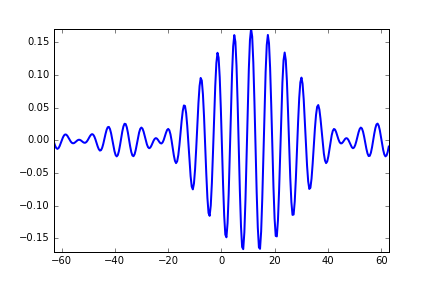
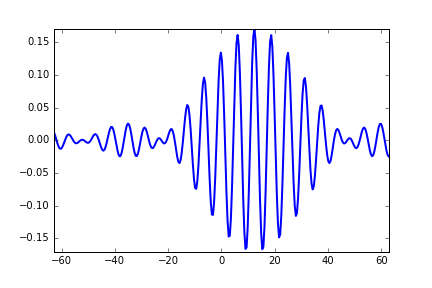
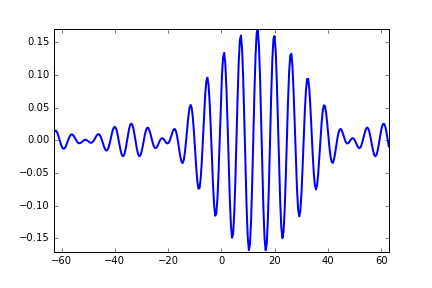
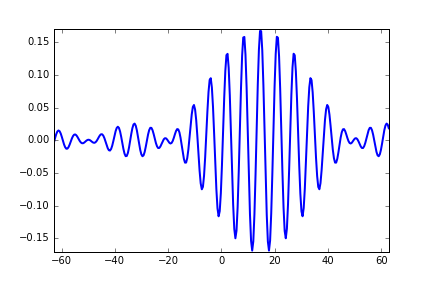
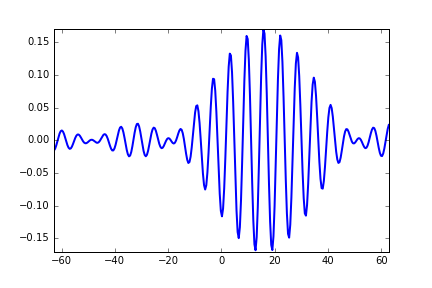
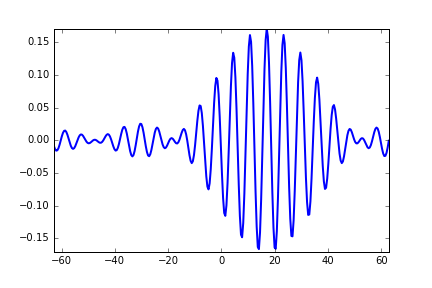
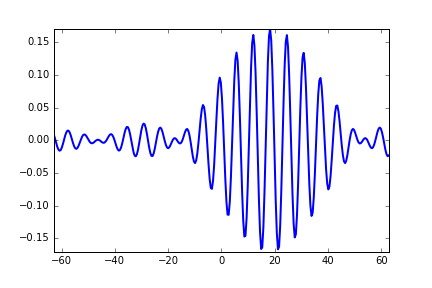
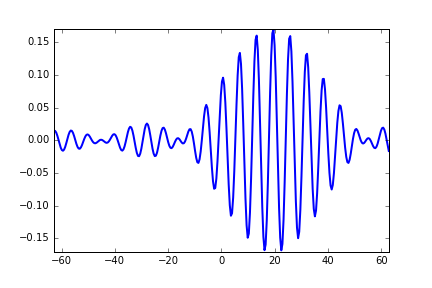
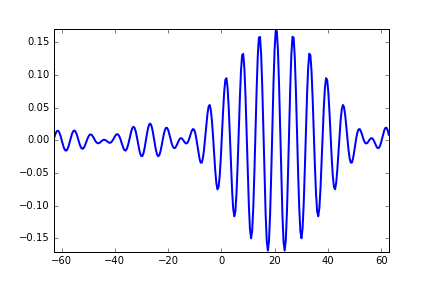
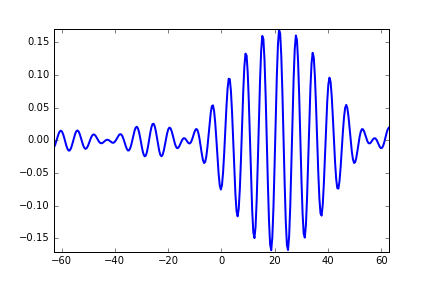
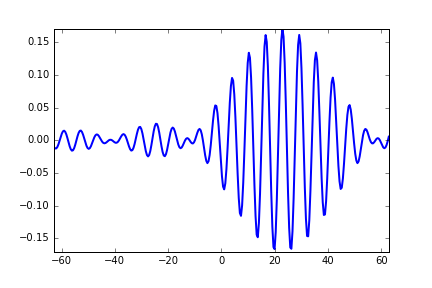
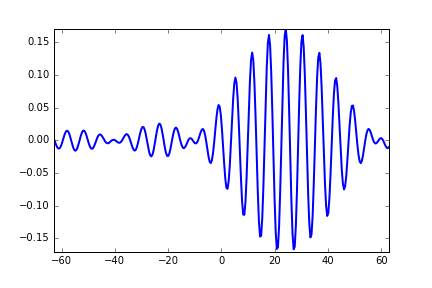
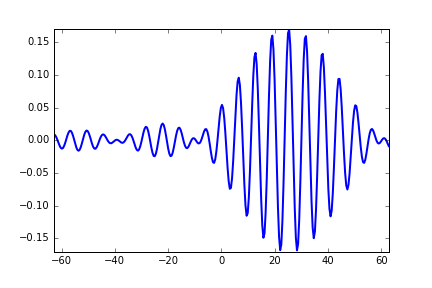
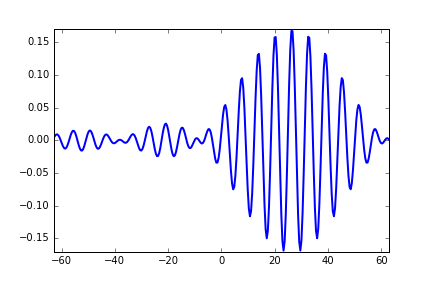
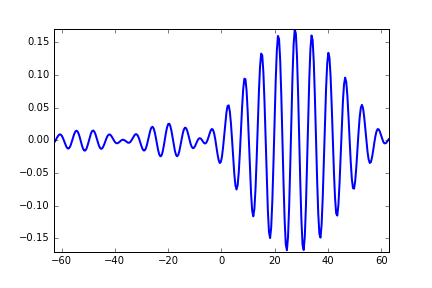
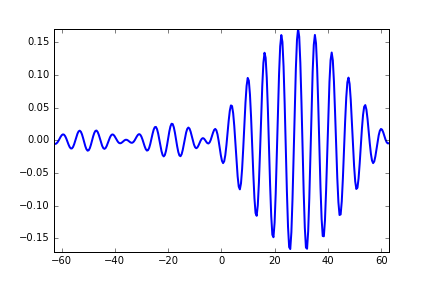
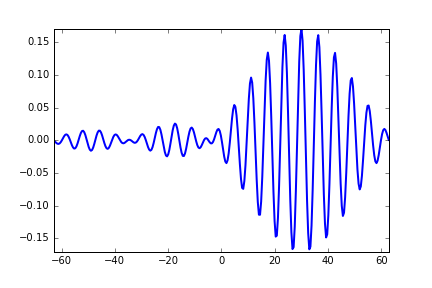
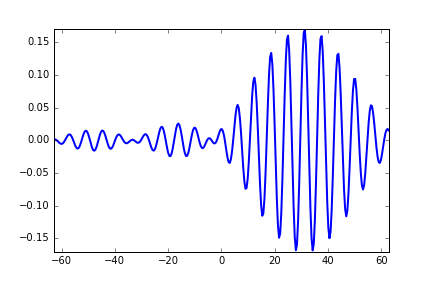
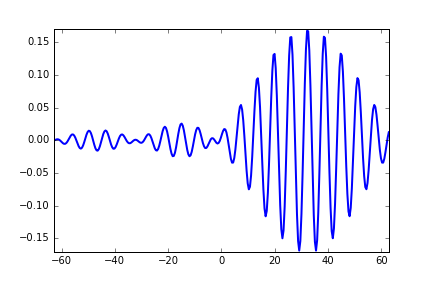
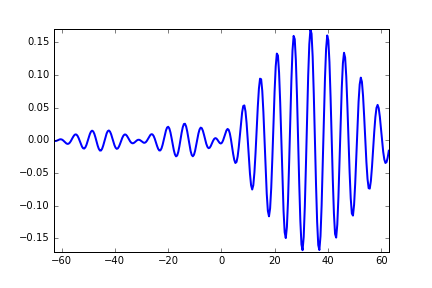
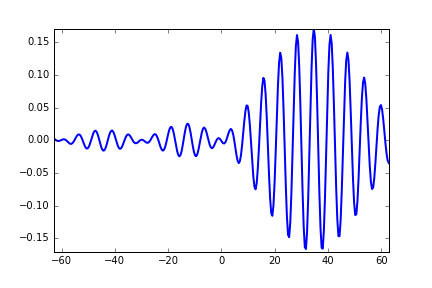
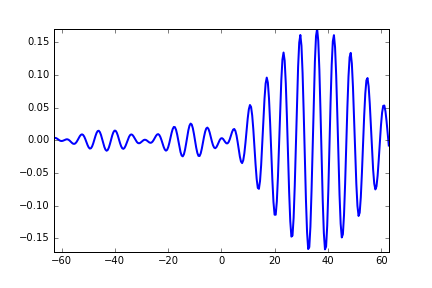
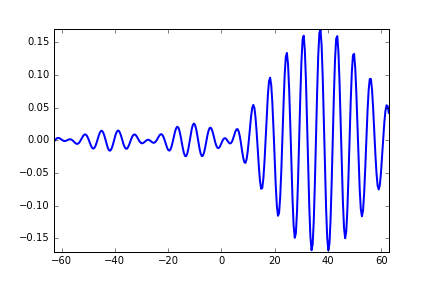
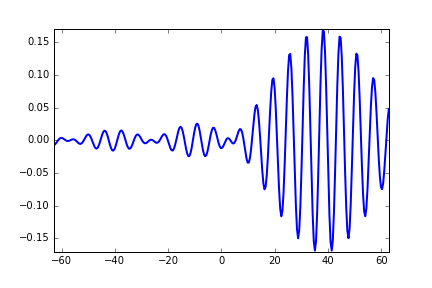
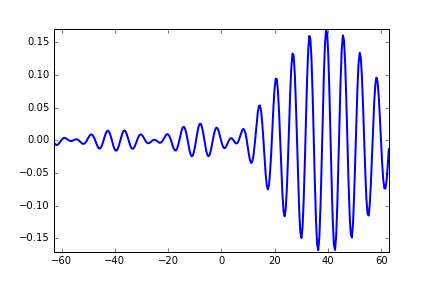
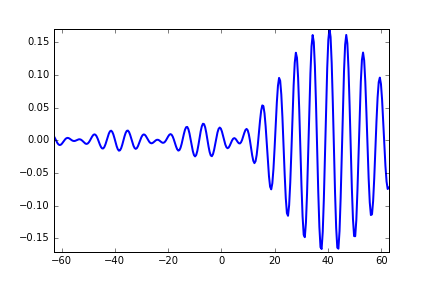
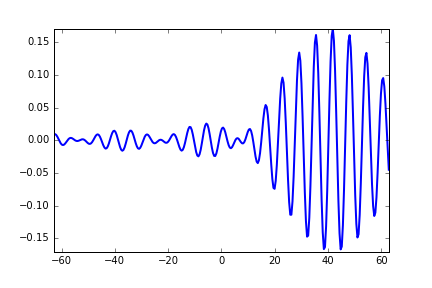
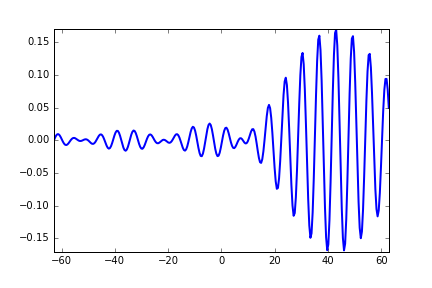
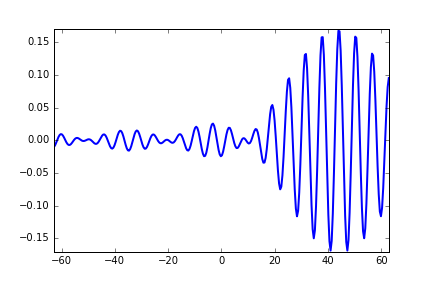
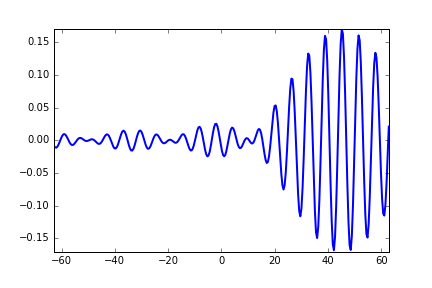
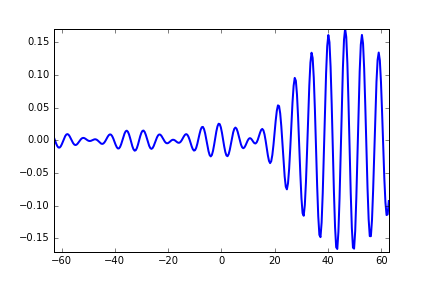
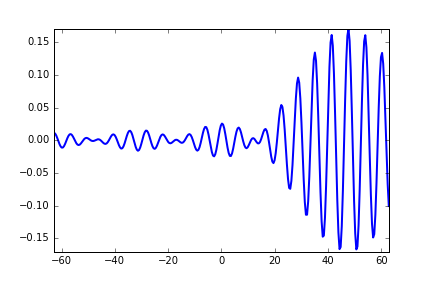
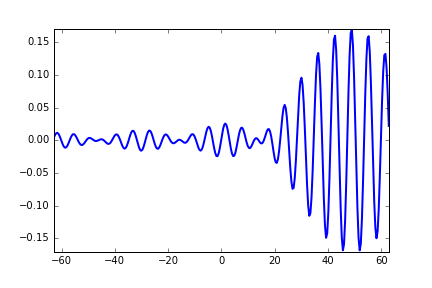
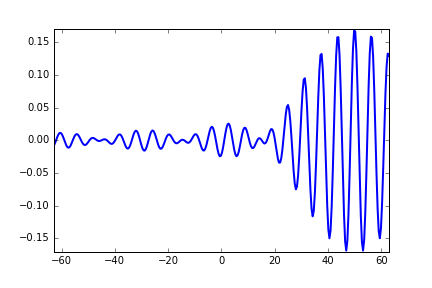
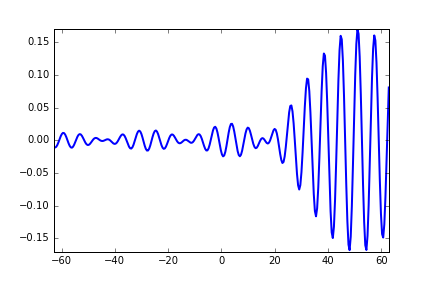
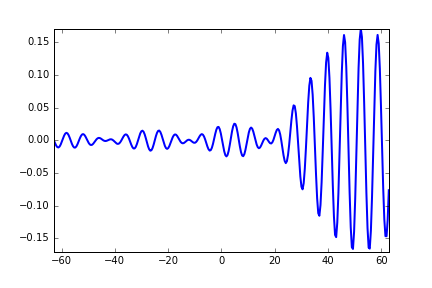
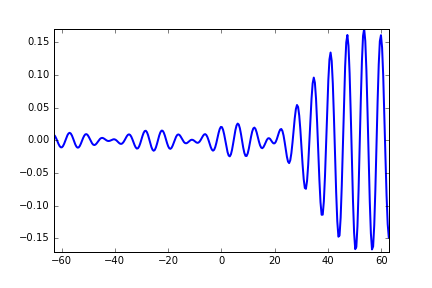
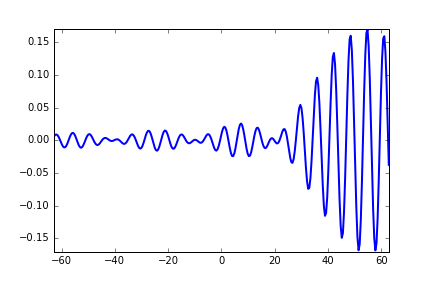
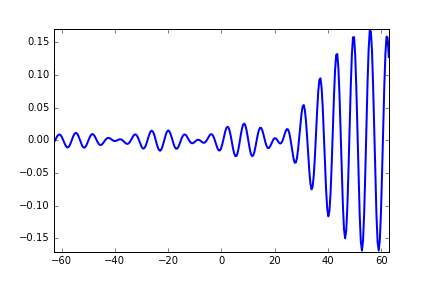
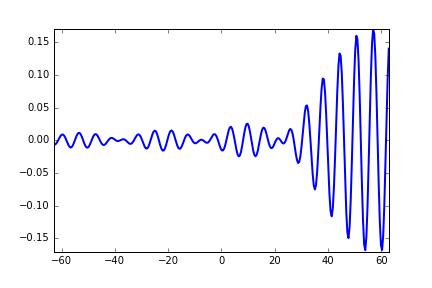
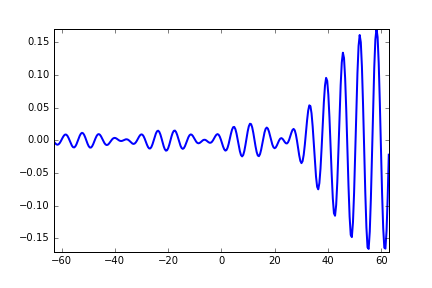
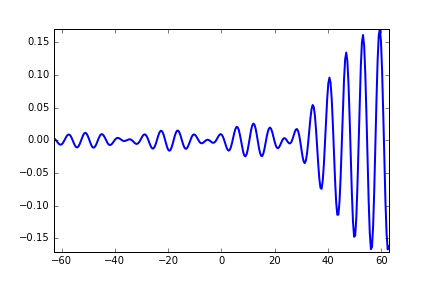
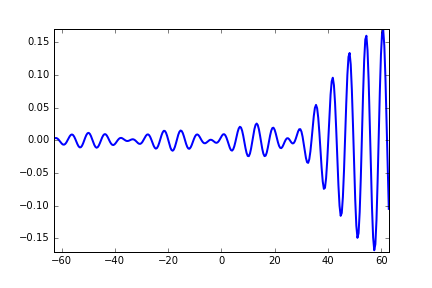
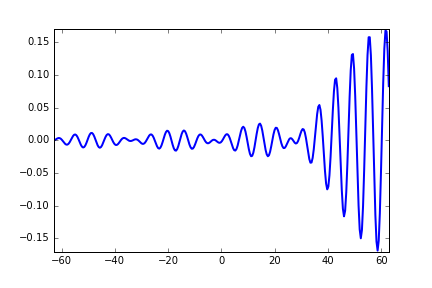
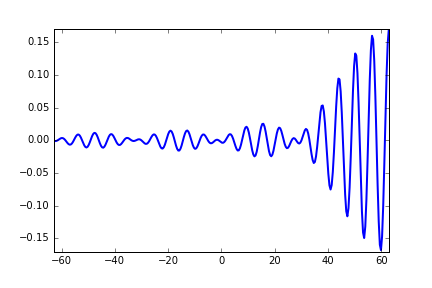
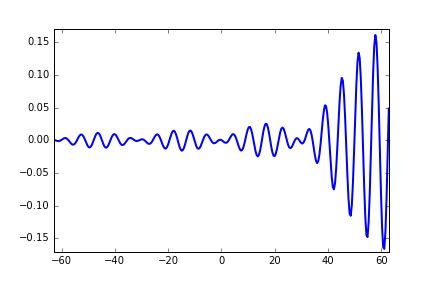
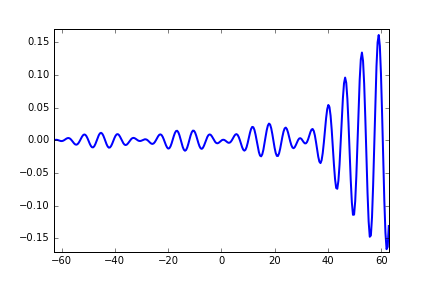
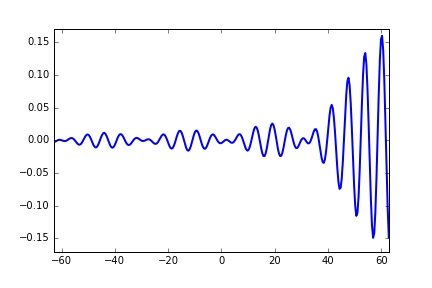
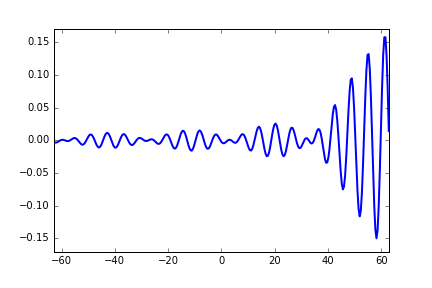
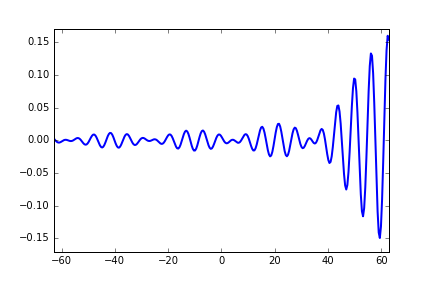
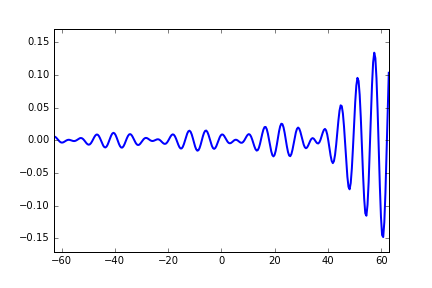

In [19]:
animation.FuncAnimation(fig, animate, init_func=init,
                        frames=linspace(-700,700,120),interval=20, blit=True)